# Plotly for PalmerPenguins Dataset

PalmerPenguins dataset has been recently introduced as an alternative to the Iris dataset that is commonly used for data exploration, visualization and classification modeling.

The PalmerPenguins data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The palmerpenguins package contains two datasets that can either be downloaded from the original GitHub link — https://github.com/allisonhorst/palmerpenguins, or can be accessed from Kaggle.

Both datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

## This notebook is particularly focussed on using rich and interactive Plotly visualizations for the Palmer Penguins Dataset. 

In [ ]:
# importing dependencies here
import pandas as pd

# plotly
from plotly import __version__

print(__version__)
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot


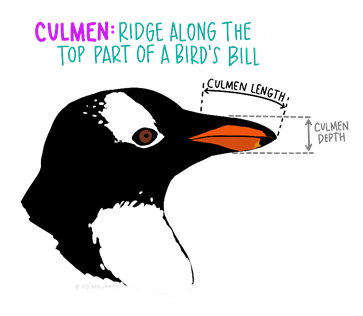

Artwork Credit: @allison_horst https://github.com/allisonhorst/palmerpenguins

In [ ]:
# reading the penguins lter dataset
penguins_df = pd.read_csv("../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv")

# checking top 5 rows
penguins_df.head()

In [ ]:
# checking the number of rows and columns
print(penguins_df.shape)

In [ ]:
# checking the column names
print(penguins_df.columns)

In [ ]:
# checking the dataset stats
penguins_df.describe()

In [ ]:
# checking counts and data type for each column
penguins_df.info()

In [ ]:
# checking for the presence of null values
penguins_df.isnull().sum()

In [ ]:
# Some of the columns have null values. Subsituting the null value with the most frequently occurring value of that column.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
penguins_df.iloc[:, :] = imputer.fit_transform(penguins_df)

In [ ]:
# ensuring that there are no more null values left
penguins_df.isnull().sum()

In [ ]:
# checking for correlation between features
penguins_df.corr()

In [ ]:
# since each of the 3 penguin species present in the dataset has a particulr color associated, adding a color column to the dataset to keep track of the color associated with a specie.
cls = {
    "Adelie": "darkorange",
    "Gentoo": "teal",
    "Chinstrap": "mediumorchid",
}

penguins_df["color"] = penguins_df["species"].apply(lambda x: cls[x])

In [ ]:
# creating a dataframe for count of each penguin species present in the dataset
species_df = (
    pd.DataFrame(penguins_df.groupby(["species", "color"])["island"].count())
    .sort_values("island", ascending=False)
    .reset_index()
    .rename(columns={"island": "count"})
)
species_df

In [ ]:
# checking island data
island_df = pd.DataFrame(
    penguins_df.groupby(["island", "species"])["island"].count()
).rename(columns={"island": "count"})

island_df

# Preparing the Data for Plotly-Based Visualizations

Plotly visualizations are easier to implement if we can aggregate the data needed for each visualization using Pandas Dataframes first.
This helps set Plotly Traces efficiently and quickly when creating Plotly Plots.

## Creating individual dataframes for each species for easy visualization

### Adelie Penguin (Pygoscelis adeliae)

In [ ]:
adelie_df = penguins_df[
    penguins_df["species"] == "Adelie"
].reset_index(drop=True)

adelie_df.head(2)

In [ ]:
adelie_count_df = (
    pd.DataFrame(adelie_df.groupby(["species", "color"])['island'].count())
#     .sort_values("species", ascending=False)
    .reset_index()
    .rename(columns={"island": "count"})
)
adelie_count_df

### Gentoo penguin (Pygoscelis papua)

In [ ]:
gentoo_df = penguins_df[
    penguins_df["species"] == "Gentoo"
].reset_index(drop=True)

gentoo_df.head(2)

In [ ]:
gentoo_count_df = (
    pd.DataFrame(gentoo_df.groupby(["species", "color"])["island"].count())
#     .sort_values("studyName", ascending=False)
    .reset_index()
    .rename(columns={"island": "count"})
)
gentoo_count_df

### Chinstrap penguin (Pygoscelis antarctica)

In [ ]:
chinstrap_df = penguins_df[
    penguins_df["species"] == "Chinstrap"
].reset_index(drop=True)

chinstrap_df.head(2)

In [ ]:
chinstrap_count_df = (
    pd.DataFrame(chinstrap_df.groupby(["species", "color"])["island"].count())
#     .sort_values("studyName", ascending=False)
    .reset_index()
    .rename(columns={"island": "count"})
)
chinstrap_count_df

## PLOTLY VISUALIZATIONS

Now when we have handled our data well by aggregating them into Dataframes keeping specific visualizations in mind, let’s get started with building the Plotly plots on the Penguin Dataset!!

### Species Count

In [ ]:
# Penguin Species Count

trace1 = go.Bar(
    x=adelie_count_df["species"],
    y=adelie_count_df["count"],
    marker=dict(color=adelie_count_df["color"], line_color="rgb(0,0,0)"),
    name="Adelie Penguin",
)

trace2 = go.Bar(
    x=gentoo_count_df["species"],
    y=gentoo_count_df["count"],
    marker=dict(color=gentoo_count_df["color"], line_color="rgb(0,0,0)"),
    name="Gentoo penguin",
)

trace3 = go.Bar(
    x=chinstrap_count_df["species"],
    y=chinstrap_count_df["count"],
    marker=dict(color=chinstrap_count_df["color"], line_color="rgb(0,0,0)"),
    name="Chinstrap penguin",
)

data = [trace1, trace2, trace3]

layout = dict(
    title="<b>Penguin Species Count</b>",
    showlegend=True,
    width=990,
    xaxis=dict(showgrid=False, title="Species"),
    yaxis=dict(title="Count"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig = dict(data=data, layout=layout)

iplot(fig)

## Species Gender Count

In [ ]:
female_df = (
    pd.DataFrame(
        penguins_df[penguins_df["sex"] == "FEMALE"][["species", "sex", "color"]]
        .groupby("species")["sex"]
        .count()
    )
    .sort_values("sex", ascending=False)
    .reset_index()
    .rename(columns={"sex": "female"})
)
female_df

In [ ]:
male_df = (
    pd.DataFrame(
        penguins_df[penguins_df["sex"] == "MALE"][["species", "sex"]]
        .groupby("species")["sex"]
        .count()
    )
    .sort_values("sex", ascending=False)
    .reset_index()
    .rename(columns={"sex": "male"})
)
male_df

In [ ]:
# penguins gender count based on species

trace1 = go.Bar(
    x=female_df["species"],
    y=female_df["female"],
    text="Female",
    textposition="outside",
    marker=dict(color=species_df["color"], line_color="rgb(0,0,0)"),
    name="Female",
)

trace2 = go.Bar(
    x=male_df["species"],
    y=male_df["male"],
    text="Male",
    textposition="outside",
    marker=dict(color=species_df["color"], line_color="rgb(0,0,0)"),
    name="Male",
)

data = [trace1, trace2]


layout = dict(
    title="<b>Penguin Gender-Based Species Count</b>",
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig = dict(data=data, layout=layout)

iplot(fig)

## Correlation Plots

In [ ]:
# Culmen Length (mm) vs. Body Mass (g)

trace1 = go.Scatter(
    x=adelie_df["culmen_length_mm"],
    y=adelie_df["body_mass_g"],
    text=adelie_df["species"],
    mode="markers",
    marker=dict(size=10, symbol="circle", line=dict(color="rgb(0,0,0)", width=0.5)),
    marker_color=adelie_df["color"],
    name="Adelie Penguin",
)

trace2 = go.Scatter(
    x=gentoo_df["culmen_length_mm"],
    y=gentoo_df["body_mass_g"],
    text=gentoo_df["species"],
    mode="markers",
    marker=dict(size=10, symbol="square", line=dict(color="rgb(0,0,0)", width=0.5)),
    marker_color=gentoo_df["color"],
    name="Gentoo penguin",
)

trace3 = go.Scatter(
    x=chinstrap_df["culmen_length_mm"],
    y=chinstrap_df["body_mass_g"],
    text=chinstrap_df["species"],
    mode="markers",
    marker=dict(
        size=12, symbol="triangle-up", line=dict(color="rgb(0,0,0)", width=0.5)
    ),
    marker_color=chinstrap_df["color"],
    name="Chinstrap penguin",
)

data = [trace1, trace2, trace3]


layout = dict(
    title="<b>Culmen Length (mm) vs. Body Mass (g)</b>",
    showlegend=True,
    xaxis=dict(title="Culmen Length (mm)"),
    yaxis=dict(title="Body Mass (g)"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)


fig = dict(data=data, layout=layout)

iplot(fig)

In [ ]:
# Flipper Length (mm) vs. Body Mass (g)

trace1 = go.Scatter(
    x=adelie_df["flipper_length_mm"],
    y=adelie_df["body_mass_g"],
    text=adelie_df["species"],
    mode="markers",
    marker=dict(size=9, symbol="circle", line=dict(color="rgb(0,0,0)", width=0.5)),
    marker_color=adelie_df["color"],
    name="Adelie Penguin",
)

trace2 = go.Scatter(
    x=gentoo_df["flipper_length_mm"],
    y=gentoo_df["body_mass_g"],
    text=gentoo_df["species"],
    mode="markers",
    marker=dict(size=9, symbol="square", line=dict(color="rgb(0,0,0)", width=0.5)),
    marker_color=gentoo_df["color"],
    name="Gentoo penguin",
)

trace3 = go.Scatter(
    x=chinstrap_df["flipper_length_mm"],
    y=chinstrap_df["body_mass_g"],
    text=chinstrap_df["species"],
    mode="markers",
    marker=dict(
        size=11, symbol="triangle-up", line=dict(color="rgb(0,0,0)", width=0.5)
    ),
    marker_color=chinstrap_df["color"],
    name="Chinstrap penguin",
)

data = [trace1, trace2, trace3]


layout = dict(
    title="<b>Flipper Length (mm) vs. Body Mass (g)</b>",
    showlegend=True,
    xaxis=dict(title="Flipper Length (mm)"),
    yaxis=dict(title="Body Mass (g)"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig = dict(data=data, layout=layout)

iplot(fig)

In [ ]:
# Culmen Depth (mm) vs. Body Mass (g)

trace1 = go.Scatter(
    x=adelie_df["culmen_depth_mm"],
    y=adelie_df["body_mass_g"],
    text=adelie_df["species"],
    mode="markers",
    marker=dict(size=9, symbol="circle", line=dict(color="rgb(0,0,0)", width=0.5)),
    marker_color=adelie_df["color"],
    name="Adelie Penguin",
)

trace2 = go.Scatter(
    x=gentoo_df["culmen_depth_mm"],
    y=gentoo_df["body_mass_g"],
    text=gentoo_df["species"],
    mode="markers",
    marker=dict(size=9, symbol="square", line=dict(color="rgb(0,0,0)", width=0.5)),
    marker_color=gentoo_df["color"],
    name="Gentoo penguin",
)

trace3 = go.Scatter(
    x=chinstrap_df["culmen_depth_mm"],
    y=chinstrap_df["body_mass_g"],
    text=chinstrap_df["species"],
    mode="markers",
    marker=dict(
        size=11, symbol="triangle-up", line=dict(color="rgb(0,0,0)", width=0.5)
    ),
    marker_color=chinstrap_df["color"],
    name="Chinstrap penguin",
)

data = [trace1, trace2, trace3]


layout = dict(
    title="<b>Culmen Depth (mm) vs. Body Mass (g)</b>",
    showlegend=True,
    xaxis=dict(title="Culmen Depth (mm)"),
    yaxis=dict(title="Body Mass (g)"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig = dict(data=data, layout=layout)

iplot(fig)

## Distributions

In [ ]:
# Flipper Length Distributions

trace1 = go.Violin(
    x=adelie_df["species"],
    y=adelie_df["flipper_length_mm"],
    box_visible=True,
    meanline_visible=True,
    points="all",
    line_color="darkorange",
    name="Adelie Penguin",
)

trace2 = go.Violin(
    x=gentoo_df["species"],
    y=gentoo_df["flipper_length_mm"],
    box_visible=True,
    meanline_visible=True,
    line_color="teal",
    points="all",
    name="Gentoo penguin",
)

trace3 = go.Violin(
    x=chinstrap_df["species"],
    y=chinstrap_df["flipper_length_mm"],
    points="all",
    box_visible=True,
    meanline_visible=True,
    line_color="mediumorchid",
    name="Chinstrap penguin",
)

data = [trace1, trace2, trace3]


layout = dict(
    title="<b>Flipper Length (mm) Distribution for the 3 Species</b>",
    showlegend=True,
    width=990,
    xaxis=dict(title="Penguin Species"),
    yaxis=dict(title="Flipper Length (mm)"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig = dict(data=data, layout=layout)

iplot(fig)

In [ ]:
# Culmen Length Distributions

trace1 = go.Violin(
    x=adelie_df["species"],
    y=adelie_df["culmen_length_mm"],
    box_visible=True,
    meanline_visible=True,
    points="all",
    line_color="darkorange",
    name="Adelie Penguin",
)

trace2 = go.Violin(
    x=gentoo_df["species"],
    y=gentoo_df["culmen_length_mm"],
    box_visible=True,
    meanline_visible=True,
    line_color="teal",
    points="all",
    name="Gentoo penguin",
)

trace3 = go.Violin(
    x=chinstrap_df["species"],
    y=chinstrap_df["culmen_length_mm"],
    points="all",
    box_visible=True,
    meanline_visible=True,
    line_color="mediumorchid",
    name="Chinstrap penguin",
)

data = [trace1, trace2, trace3]


layout = dict(
    title="<b>Culmen Length (mm) Distribution for the 3 Species</b>",
    showlegend=True,
    width=990,
    xaxis=dict(title="Penguin Species"),
    yaxis=dict(title="Culmen Length (mm)"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig = dict(data=data, layout=layout)

iplot(fig)


In [ ]:
# Culmen Depth Distributions

trace1 = go.Violin(
    x=adelie_df["species"],
    y=adelie_df["culmen_depth_mm"],
    box_visible=True,
    meanline_visible=True,
    points="all",
    line_color="darkorange",
    name="Adelie Penguin",
)

trace2 = go.Violin(
    x=gentoo_df["species"],
    y=gentoo_df["culmen_depth_mm"],
    box_visible=True,
    meanline_visible=True,
    line_color="teal",
    points="all",
    name="Gentoo penguin",
)

trace3 = go.Violin(
    x=chinstrap_df["species"],
    y=chinstrap_df["culmen_depth_mm"],
    points="all",
    box_visible=True,
    meanline_visible=True,
    line_color="mediumorchid",
    name="Chinstrap penguin",
)

data = [trace1, trace2, trace3]


layout = dict(
    title="<b>Culmen Depth (mm) Distribution for the 3 Species</b>",
    showlegend=True,
    width=990,
    xaxis=dict(title="Penguin Species", showgrid=True),
    yaxis=dict(title="Culmen Depth (mm)"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

fig = dict(data=data, layout=layout)

iplot(fig)